Dados retirados do [kaggle](https://www.kaggle.com/datasets/bhumikatandon/diabetes-classification-dataset).

**SOBRE**  
Previsão de Diabetes com base em fatores como IMC, idade, número de gestações, entre outros.  

**VARIÁVEIS**  
- **num_preg:** Número de vezes grávida;
- **plasma_glucose_conc:** Concentração de glicose plasmática 2 horas após um teste oral de tolerância à glicose;
- **bp:** Pressão arterial diastólica (mm Hg);
- **tricepsthickness:** Espessura da prega cutânea do tríceps (mm);
- **insulin:** Insulina sérica em 2 horas (mu U/ml);
- **BMI:** Índice de massa corporal (peso em kg/(altura em m)^2);
- **pedigree_func:** Função pedigree do diabetes;
- **age:** Idade (anos)
- **target:** Estado diabético.

# PREPARATION, ORGANIZATION, AND STRUCTURING OF DATA
Inicialmente, podemos verificar o conjunto de dados.

In [1]:
# Data analysis and manipulation
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data_analytics/diabetes/diabetesData.csv')

df.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


Após isso, podemos conhecer mehor o dataset, observando a quantidade de variáveis e registros.

In [3]:
df.shape

(768, 9)

O dataframe possui 768 registros e 9 variáveis.

1\) Optimization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_preg             768 non-null    int64  
 1   plasma_glucose_conc  768 non-null    int64  
 2   bp                   768 non-null    int64  
 3   tricepsthickness     768 non-null    int64  
 4   insulin              768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   pedigree_func        768 non-null    float64
 7   age                  768 non-null    int64  
 8   target               768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


O dataframe ocupa 54.1Kb de memória, um valor considerado baixo para esse caso, porém, vamos otimizá-lo, por questões de boa prática.

In [5]:
# selecting numeric columns by type
cols_float = df.select_dtypes(include='float64').columns
cols_int = df.select_dtypes(include='int64').columns

In [6]:
# applying downcast to float and int columns
df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float')
df[cols_int] = df[cols_int].apply(pd.to_numeric, downcast='integer')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_preg             768 non-null    int8   
 1   plasma_glucose_conc  768 non-null    int16  
 2   bp                   768 non-null    int8   
 3   tricepsthickness     768 non-null    int8   
 4   insulin              768 non-null    int16  
 5   BMI                  768 non-null    float32
 6   pedigree_func        768 non-null    float32
 7   age                  768 non-null    int8   
 8   target               768 non-null    object 
dtypes: float32(2), int16(2), int8(4), object(1)
memory usage: 18.1+ KB


Aproximadamente 36Kb de memória foram liberados.

2\) Null values  
É importante verificar valores ausentes.

In [7]:
df.isnull().sum()

,0
num_preg,0
plasma_glucose_conc,0
bp,0
tricepsthickness,0
insulin,0
BMI,0
pedigree_func,0
age,0
target,0


Não há valores nulos em nenhuma das variáveis.

3\) Zero values  
Assim como valores nulo, valores zero podem ser erros de medida.

In [8]:
# Check for zeros in the variables
df.isin([0]).sum()

,0
num_preg,111
plasma_glucose_conc,5
bp,35
tricepsthickness,227
insulin,374
BMI,11
pedigree_func,0
age,0
target,0


Dado a natureza das variáveis, valores zero são incongruente às mesmas. Não obstante, trataremos dos mesmo posteriormente.

# CORRELATION
Basicamente, mede força, direção e significância estatística do relacionamento entre duas variáveis quantitativas.

Para esse estudo, nosso objetivo é verificar se há correlação entre a variável target e as demais.

## Guidelines
Alguns critérios precisam ser atendidos para utilizar Correlação Linear de Pearson. Caso os mesmos não sejam atendidos, um teste não-paramétrico deve ser utilizado.

1\) Measurement scale  
As variáveis devem ser medidas em uma escala intervalar ou de razão.

In [9]:
df.dtypes

,0
num_preg,int8
plasma_glucose_conc,int16
bp,int8
tricepsthickness,int8
insulin,int16
BMI,float32
pedigree_func,float32
age,int8
target,object


A variável _target_ está em um tipo incompatível com a correlação, porém, a mesma pode ser convertida para o tipo quantitativo, que é desejado para o estudo. Utilizaremos o método _dummy variable_ para isso.

In [10]:
df2 = pd.get_dummies(df, columns=['target'], drop_first=True)

In [11]:
df2['target_tested_positive'] = df2.target_tested_positive.astype('int8')

In [12]:
df2.rename(columns={'target_tested_positive': 'tested_positive'}, inplace=True)

In [13]:
df2.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,tested_positive
0,6,148,72,35,0,33.599998,0.627,50,1
1,1,85,66,29,0,26.600000,0.351,31,0
2,8,183,64,0,0,23.299999,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.099998,2.288,33,1


2\) Functional independence  
É necessário que determinada variável não seja calculada diretamente a partir de outra. Conhecendo a natureza dos dados, concluimos que as variáveis são independentes.

3\) Relationship between the variables  
As variáveis devem possuir relação linear.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [15]:
# setting a light background theme
sns.set_theme(style='whitegrid')

plt.rcParams.update({
    'text.color': 'gray',             # text color
    'axes.labelcolor': 'gray',        # axis label color
    'axes.edgecolor': 'gray',         # axis border color
    'xtick.color': 'gray',            # x-axis tick color
    'ytick.color': 'gray',            # y-axis tick color
    'axes.titlecolor': 'gray',        # axis title color
    'axes.edgecolor': 'lightgray',    # axis border color
    'axes.facecolor': 'white',        # axis background color
    'figure.facecolor': 'white',      # figure background color
    'figure.edgecolor': 'white'
    })

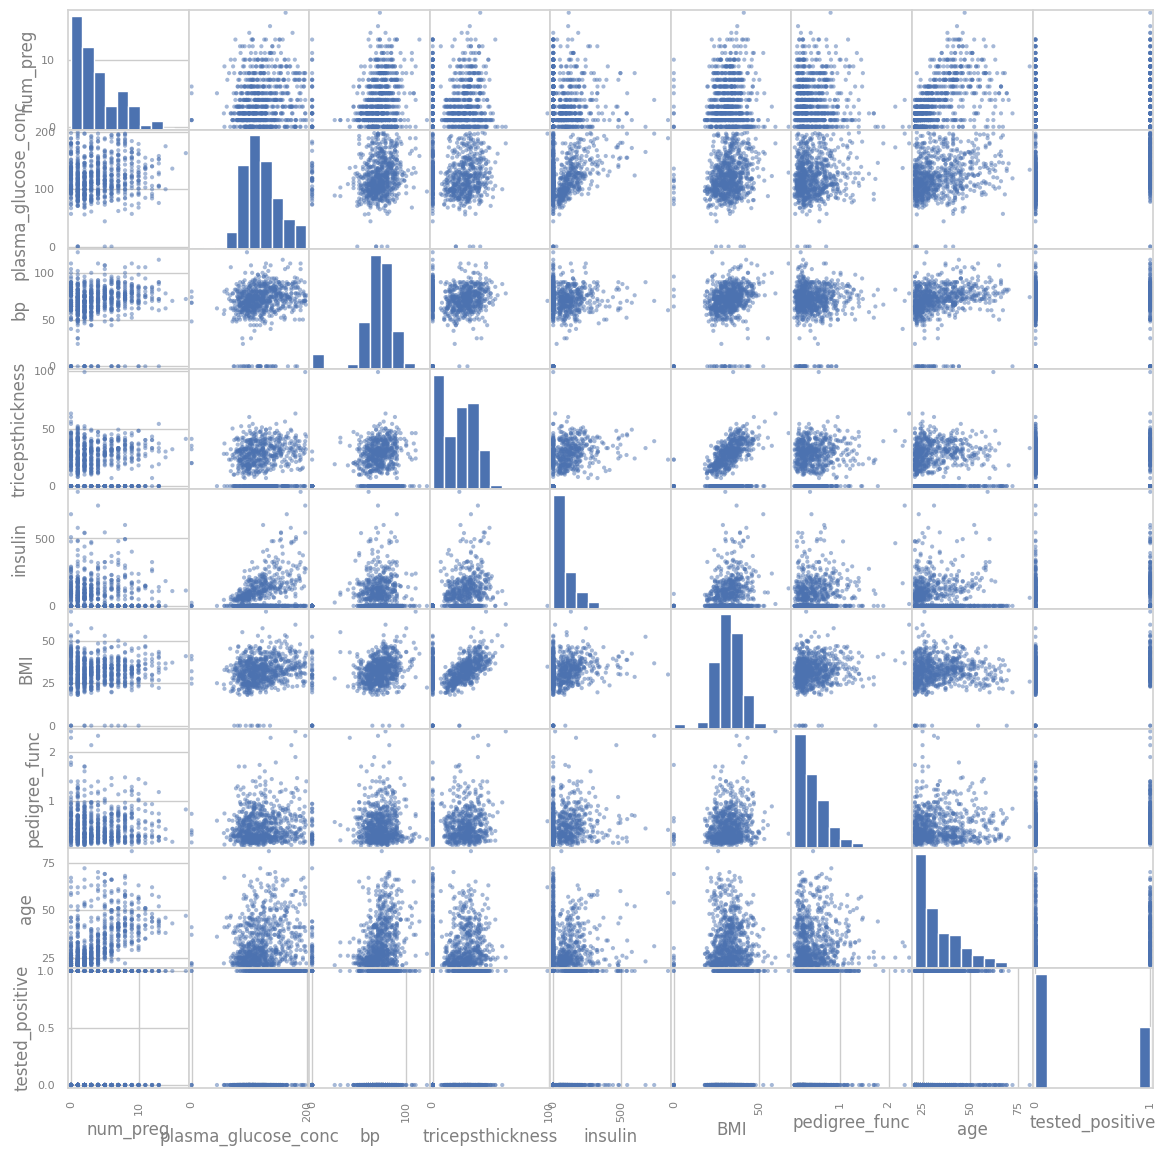

In [16]:
scatter_matrix(df2, figsize=(14, 14));

Insights:
1. É possível notar poucas correlações com índicio de linearidade;
2. Fica evidente a incoerência dos "zeros" nas correlações.

Por hora, vamos prosseguir com a análise.

4\) Normality  
As distribuições das variáveis devem ser normais (ou aproximadamente).

**QQ-PLOT**  
Se os pontos se alinharem aproximadamente ao longo da linha reta no gráfico, a variável pode ser considerada normalmente distribuída.

In [17]:
from scipy import stats

In [18]:
def qq_subplots(df):
    # determine the number of rows
    nrows = (len(df.columns) + 1) // 2 # round up for odd numbers

    # create the subplots
    fig, ax = plt.subplots(nrows, 2, figsize=(12, nrows * 4))

    # flatten the axes for easy iteration
    ax = ax.flatten()

    # QQ-plot graphs
    for i, column in enumerate(df.columns):
        stats.probplot(df[column], dist="norm", plot=ax[i])
        ax[i].set_title(f"QQ-plot de {column}")

    # remove possible "empty" subplots
    for j in range(len(df.columns), len(ax)):
        fig.delaxes(ax[j])

    return plt.tight_layout()

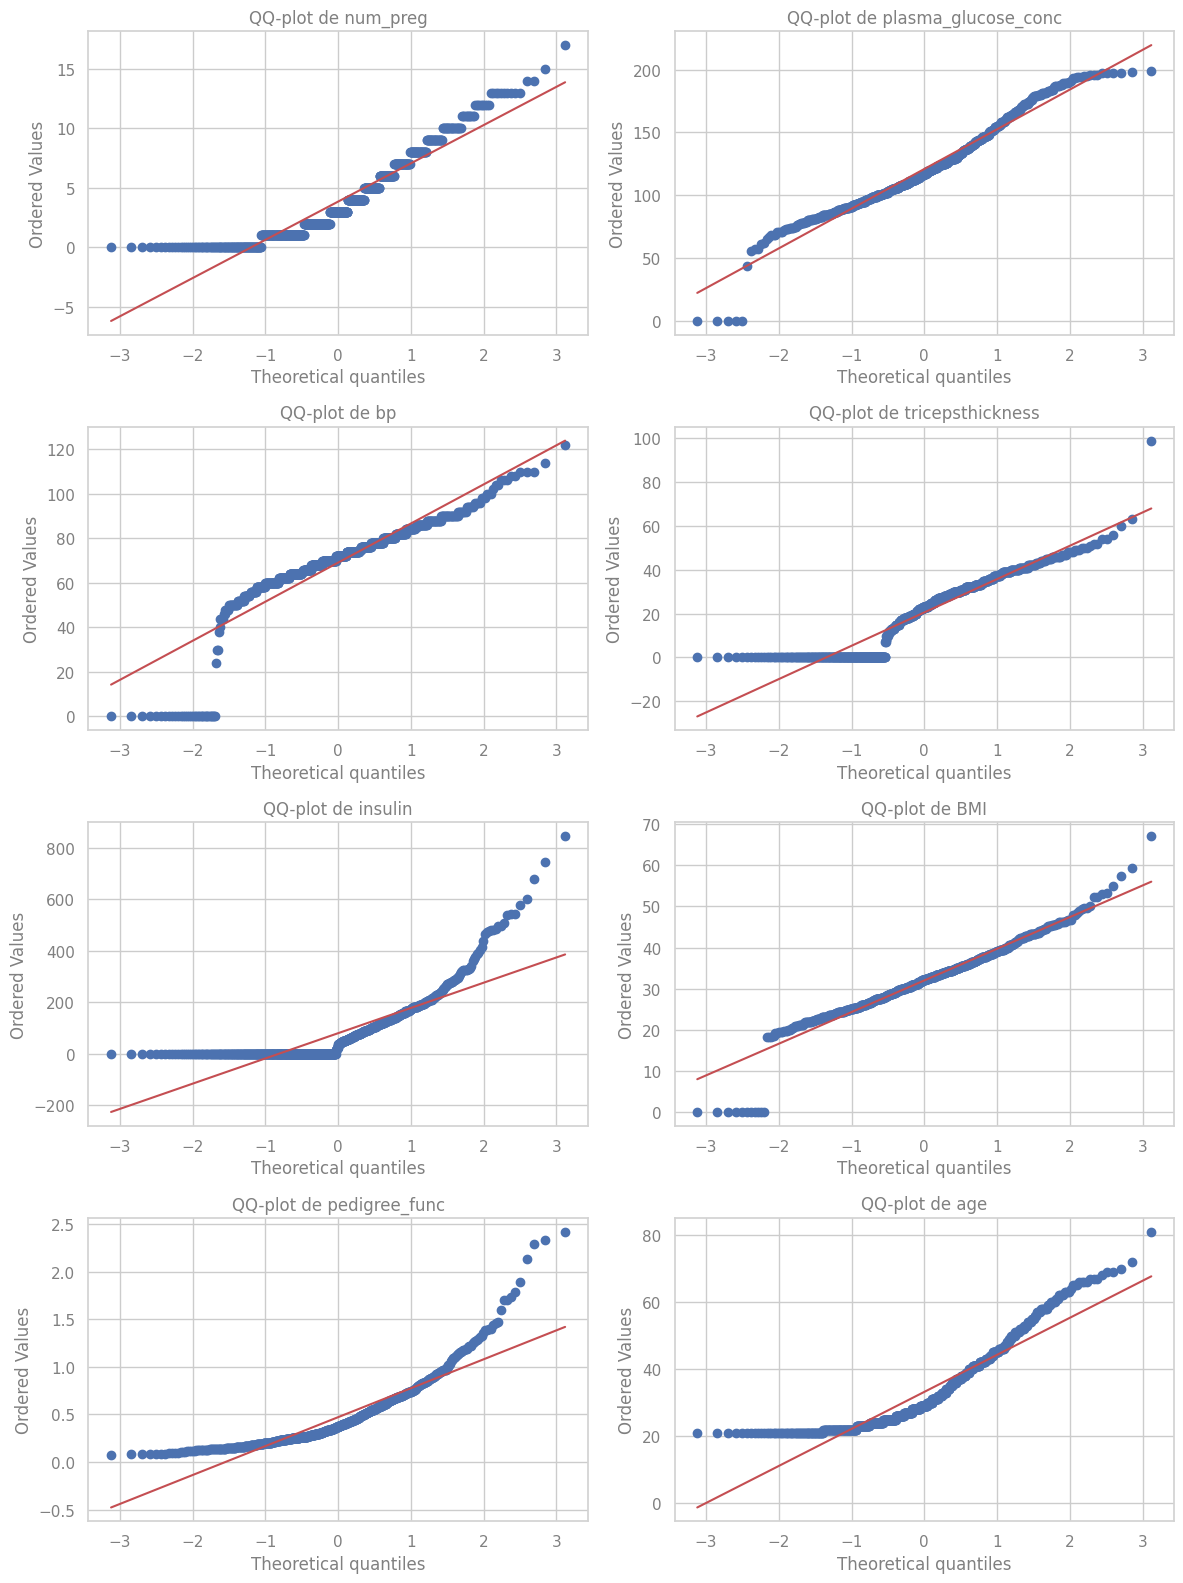

In [19]:
qq_subplots(df2.drop('tested_positive', axis=1))

**TESTES NUMÉRICOS**  
Critério:
- **Nível de significância (α)**: 0.05;

Hipóteses:
- **H<sub>0</sub>**: A variável segue uma distribuição normal;
- **H<sub>1</sub>**: A variável não segue uma distribuição normal.

In [20]:
from statsmodels.stats.diagnostic import lilliefors

In [21]:
def normality_tests(df):
    results = []

    # multiple numerical normality tests
    for i in df.columns:
        shapiro = stats.shapiro(df[i])[1]
        lillie = lilliefors(df[i], dist="norm")[1]
        jarque = stats.jarque_bera(df[i])[1]
        anderson = stats.anderson(df[i], dist="norm")[1][2] # alpha = 0.05

        results.append({"SHAPIRO": shapiro, "LILLIEFORS": lillie,
                        "JARQUE": jarque, "ANDERSON": anderson})

    # returns the p-value of the variables
    return pd.DataFrame(results, index=df.columns)

In [22]:
normality_tests(df2.drop('tested_positive', axis=1))

,SHAPIRO,LILLIEFORS,JARQUE,ANDERSON
num_preg,1.609257e-21,0.001,2.154937e-23,0.783
plasma_glucose_conc,1.986347e-11,0.001,2.609627e-04,0.783
bp,1.584162e-28,0.001,2.561918e-278,0.783
tricepsthickness,1.751754e-21,0.001,5.718137e-03,0.783
insulin,7.914332e-34,0.001,0.000000e+00,0.783
BMI,1.841651e-15,0.001,9.996994e-80,0.783
pedigree_func,2.477504e-27,0.001,0.000000e+00,0.783
age,2.402274e-24,0.001,8.022504e-39,0.783


A partir dos resultados dos testes, assumimos que nenhuma variável será considerada normal. Não obstante, vale lembrar que os valores zero possivelmente contribuem para essa anormalidade, contudo, prosseguiremos com a proposta de não-normalidade. Ainda assim, vamos prosseguir para o teste de análise de outliers.

5\) Outliers

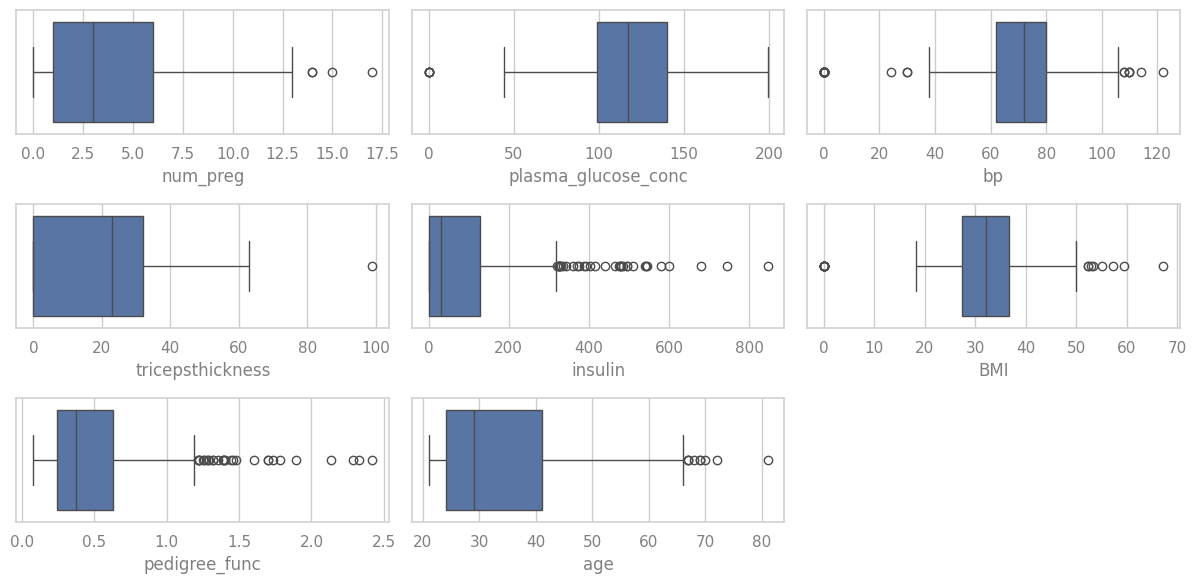

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(12, 6))

for i, ax_i in enumerate(ax.flatten()):
    if i < df2.shape[1] -1:
        sns.boxplot(df2, x=df2.iloc[:, i], ax=ax_i)

ax_i.axis('off')
plt.tight_layout();

A observação dos gráficos sugere que o impacto dos valores zero de fato impactam a distribuição das variáveis. Dessa forma, utilizaremos o teste de Correlação de Spearman, que não possui pressuposto de normalidade e é robusto a interferência de outliers.

## Spearman's Rho
Mede força, direção e significância do relacionamento entre duas variáveis quantitativas.

1\) Strength and direction  
A força da correlação indica quão fortemente duas variáveis estão relacionadas, já a direção, se a relação entre as mesmas é ascendente ou descendente.

| COEFICIENTE | GRAU |
- | - |
| r = ±1 | Perfeita |
| ±0,8 ≤ r < ±1 | Muito forte |
| ±0,6 ≤ r <± 0,8 | Forte |
| ±0,4 ≤ r < ±0,6 | Moderada |
| ±0,2 ≤ r < ±0,4 | Fraca |
| 0 < r < ±0,2 | Muito fraca |
| r = 0 | Inexistente |

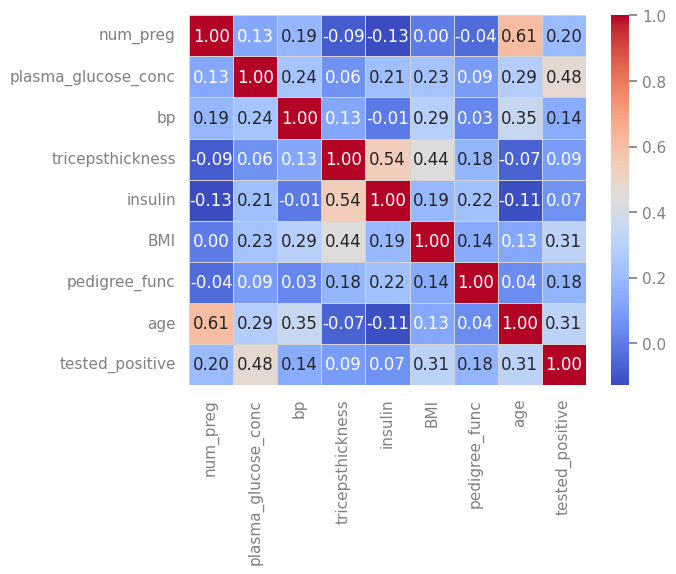

In [24]:
sns.heatmap(df2.corr(method='spearman'), annot=True, linecolor='lightgrey',
            fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5);

Podemos observar correlações de _Muito fraca_ a _Moderada_ entre tested_positive (target) e as demais.

2\) Statistical significance  
Descreve se a correlação observada é estatisticamente significativa.

Critérios:
- **Nível de significância (α):** 0,05.

Hipóteses:
- **H<sub>0</sub>:** Não há correlação significativa entre as variáveis;
- **H<sub>1</sub>:** Há correlação significativa entre as variáveis.

In [25]:
p_values = []

for i in df2.columns[:-1]:
    estat, p_value = stats.spearmanr(df2['tested_positive'], df2[i])
    p_values.append(p_value)

pd.DataFrame({'p-value': p_values}, index=df2.columns[:-1])

,p-value
num_preg,2.812784e-08
plasma_glucose_conc,1.230578e-44
bp,7.046677e-05
tricepsthickness,1.286164e-02
insulin,6.559922e-02
BMI,1.552760e-18
pedigree_func,1.010634e-06
age,1.852974e-18


Dado o nível de significância escolhido, apenas **insulin** não acusou correlação significativa com a variável target.

# XGBOOST CLASSIFIER
Algoritmo de aprendizado de máquina baseado em árvores de decisão, otimizado para tarefas de classificação. Utiliza o método de boosting para combinar múltiplas árvores e melhorar a precisão do modelo, minimizando erros e viés.

## Data preprocessing
Etapa de preparação dos dados antes de serem usados em um modelo de machine learning.

1\) Zero value treatment  
Valores zero são incoerentes com a proposta das variáveis do estudo.  
Optamos por utilizar a técnica *K-Nearest Neighbors imputation* para tratar os valores zero no dataset, pois se assumiu que remover os registros seria mais prejudicial que fazer a imputação de valores.

In [26]:
import warnings
import numpy as np
from sklearn.impute import KNNImputer

In [27]:
warnings.simplefilter(action='ignore', category=FutureWarning)

imputer = KNNImputer(n_neighbors=3)

In [28]:
df3 = df2.copy()

In [29]:
# Replace 0 with NaN in the variables, except for the target.
df3.iloc[:, :-1] = df3.iloc[:, :-1].replace(0, np.nan)

df3.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,tested_positive
0,6.0,148.0,72.0,35.0,NaN,33.599998,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.600000,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.299999,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.099998,2.288,33,1


In [30]:
df3 = pd.DataFrame(imputer.fit_transform(df3), columns=df3.columns)

df3.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,tested_positive
0,6.000000,148.0,72.0,35.0,125.333333,33.599998,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.0,66.666667,26.600000,0.351,31.0,0.0
2,8.000000,183.0,64.0,30.0,195.000000,23.299999,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.0,94.000000,28.100000,0.167,21.0,0.0
4,8.666667,137.0,40.0,35.0,168.000000,43.099998,2.288,33.0,1.0


## Model

1\) Variable selection

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df3.drop('tested_positive', axis=1)
y = df3['tested_positive']

2\) Data split  
Os dados serão divididos em dados de treino e teste.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

3\) Model creation and tuning

In [34]:
from xgboost import XGBClassifier

In [35]:
best_params = {
    'n_estimators': 50,
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 1.0,
    'colsample_bytree': 1.0
}

In [36]:
model = XGBClassifier(
    **best_params,
    eval_metric='auc',        # Evaluation metric
    random_state=42
    ).fit(
    X_train,
    y_train
)

## Evaluation
Não basta simplesmente implementar o modelo, é necessário saber se o mesmo é eficiente. Isso pode ser medido através de determinadas métricas.

### Feature importance

In [37]:
# Get importances
importances = model.feature_importances_ # gain

In [38]:
# Sort feature importances in ascending order
indices = importances.argsort()

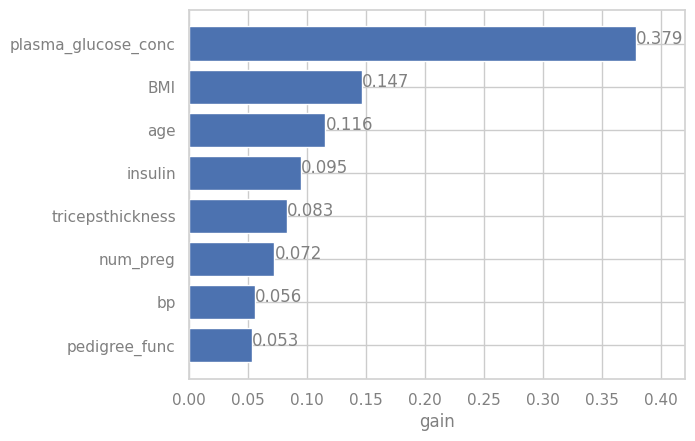

In [39]:
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])

for i, v in enumerate(importances[indices]):
    plt.text(v, i, f'{v:.3f}')

plt.xlim(0, max(importances[indices]) * 1.11)
plt.xlabel('gain');


A variável de maior peso para o modelo é _plasma_glucose_conc_, a mesma de maior força e significância encontrada no estudo de correlação.

### Global metrics  
Avaliam o desempenho geral do modelo.

In [40]:
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score

1\) ROC-AUC (Receiver Operating Characteristic - Area Under Curve)  
Mede a capacidade do modelo em distinguir entre as classes positiva e negativa em diferentes limiares.

In [41]:
# Probabilistic predictions for class 1
y_proba = model.predict_proba(X_test)[:, 1]

In [42]:
roc_auc_score(y_test, y_proba)

0.7976407284768212

O resultado indica que o modelo tem boa capacidade de distinguir entre os tipos de paciente.

2\) Log Loss  
Mede a qualidade das probabilidades previstas pelo modelo (quanto menor, melhor).

In [43]:
log_loss(y_test, y_proba)

0.5305296232765488

O valor de 0.5306 é aceitável, porém, há espaço para melhorias. Ele sugere que o modelo ainda apresenta incerteza em algumas previsões, especialmente para probabilidades mais baixas.

3\) Accuracy  
Mede a proporção de previsões corretas em relação ao total.

In [44]:
y_pred = model.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.7575757575757576


O resultado indica que o modelo é razoavelmente bom em termos de previsões globais. No entanto, considerando que o conjunto de dados é desbalanceado (65% dos registros pertencem à classe 0), a acurácia sozinha não é suficiente para avaliar completamente o desempenho do modelo.

### Confusion matrix-based metrics
Avaliação do desempenho em um limiar específico.

In [46]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
    )

1\) Confusion matrix

In [47]:
confusion_matrix(y_test, y_pred)

array([[119,  32],
       [ 24,  56]])


A matriz mostra que o modelo tem mais dificuldade em prever corretamente a classe 1 (diabetes), provavelmente devido ao desbalanceamento do dataset.

2\) Precision  
Avalia a qualidade das predições positivas.

In [48]:
def cm_metrics(y_true, y_pred, metric):
    funcs = {'precision': precision_score, 'recall': recall_score, 'f1-score': f1_score}

    for cls in [0, 1]:
        print(f'{metric.capitalize()} (class {cls}): {funcs[metric](y_true, y_pred, pos_label=cls)}')

In [49]:
cm_metrics(y_test, y_pred, 'precision')

Precision (class 0): 0.8321678321678322
Precision (class 1): 0.6363636363636364


Cerca de 83,22% das amostras classificadas como **classe 0** realmente pertencem a ela. O modelo é bom em evitar falsos positivos para a classe 0.  
Para a **classe 1**, 63,64% das amostras foram classificadas corretamente. Isso indica que o modelo tem mais incerteza ao identificar pacientes com diabetes, possivelmente devido ao menor número de exemplos da classe 1.

3\) Recall  
Avalia a capacidade do modelo de capturar todas as instâncias positivas.

In [50]:
cm_metrics(y_test, y_pred, 'recall')

Recall (class 0): 0.7880794701986755
Recall (class 1): 0.7



Aproximadamente 78,81% das amostras da classe 0 foram corretamente identificadas como tal. Apesar do resultado, há espaço para redução nos falsos positivos.  
A classe 1 apresentou 70% das amostras classificadas corretamente. O modelo consegue capturar a maioria dos casos positivos para diabetes, mas deixa escapar alguns (falsos negativos).

4\) F1-Score  
Combina Precision e Recall em uma única métrica, considerando ambas igualmente importantes.

In [51]:
cm_metrics(y_test, y_pred, 'f1-score')

F1-score (class 0): 0.8095238095238095
F1-score (class 1): 0.6666666666666666



O resultado de 0,81 demonstra equilíbrio entre precisão e recall na classe 0, indicando que o modelo é consistente em identificar corretamente os pacientes sem diabetes.  
O desempenho na classe 1 é razoável, mas menor do que na 0. O resultado de 0,695 reflete os desafios do desbalanceamento e a maior incerteza do modelo ao prever casos de diabetes.

5\)  F1-score Macro  
Calcula o F1-score para cada classe e faz a média aritmética desses valores.

In [52]:
f1_score(y_test, y_pred, average='macro')

0.7380952380952381


Com um F1 macro de 0.7381, o modelo tem um desempenho balanceado, mas ainda favorece a classe 0, devido ao desbalanceamento natural do dataset.

### Metrics for imbalanced problems
1\) Balanced accuracy  
Média entre a sensibilidade (recall da classe positiva) e a especificidade (recall da classe negativa), oferecendo uma visão mais equilibrada da performance do modelo nas diferentes classes.

$$
\text{Balanced Accuracy} = \frac{\text{Recall}_{\text{classe 0}} + \text{Recall}_{\text{classe 1}}}{2}
$$

In [53]:
from sklearn.metrics import balanced_accuracy_score, auc, precision_recall_curve

In [54]:
balanced_accuracy_score(y_test, y_pred)

0.7440397350993377


Indica que, em média, o modelo consegue identificar corretamente aproximadamente 74,41% dos casos em ambas as classes. Esse resultado demonstra que o modelo possui desempenho razoavelmente equilibrado entre as classes, apesar do desbalanceamento.

2\) Precision-Recall AUC  
Similar ao ROC-AUC, mas mais informativa em cenários desbalanceados, pois foca na classe positiva.

In [55]:
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_proba)

In [56]:
pr_auc = auc(recalls, precisions)

pr_auc

0.6799322290862073


Um resultado de 0.6799 indica que, de forma agregada, há equilíbrio moderado entre precisão e recall ao longo de vários pontos de corte, indicando algum poder de discriminação no modelo.  
Em cenários com desbalanceamento, é comum que o PR-AUC seja menor do que o ROC-AUC, pois a curva Precision-Recall é mais sensível à classe minoritária.

### Curves
1\) ROC-AUC Curve

In [57]:
from sklearn.metrics import roc_curve

In [58]:
# Calculate the ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)

In [59]:
roc_auc = auc(fpr, tpr)

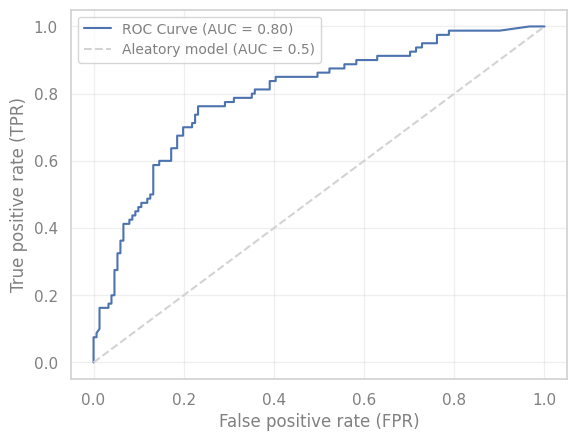

In [60]:
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='lightgrey',
         label='Aleatory model (AUC = 0.5)')

plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.legend(loc='best', prop={'size': 10})
plt.grid(alpha=0.3);

Interpretação:  
- **Bom desempenho inicial:** A curva sobe rapidamente no início, mostrando que o modelo consegue identificar muitos pacientes com diabetes (classe 1) com poucos falsos positivos (classe 0);
- **Equilíbrio (sensibilidade-especificidade):** Na região intermediária, o modelo começa a cometer mais falsos positivos à medida que identifica mais verdadeiros positivos;
- **Ponto ideal:** A curva se aproxima bem do canto superior esquerdo (0,1), sugerindo que o modelo é eficiente, mas ajustes no limiar de decisão podem melhorar o desempenho do modelo.

2\) Precision-Recall AUC Curve  
Mostra a relação entre precisão e recall em diferentes limiares de decisão. Útil para avaliar modelos em datasets desbalanceados, já que foca na classe positiva.

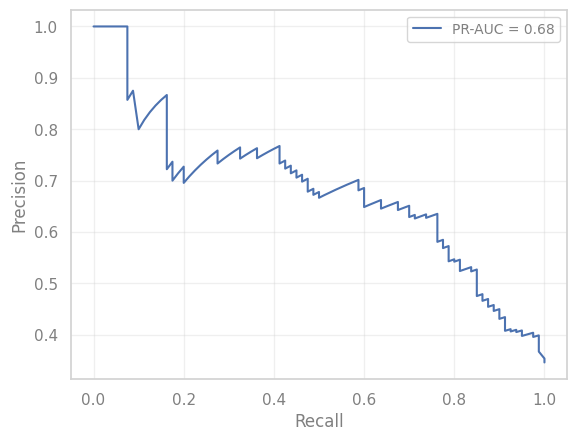

In [61]:
plt.plot(recalls, precisions, label=f'PR-AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best', prop={'size': 10})
plt.grid(alpha=0.3);

Interpretação:
- **Forma da Curva:** A curva mostra como a precisão e o recall se comportam de forma oposta. No geral, à medida que o recall aumenta (mais verdadeiros positivos são identificados), a precisão tende a diminuir (mais falsos positivos são incluídos), sugerindo assim que o modelo é mais efetivo em cenários de baixo recall (parte inicial);
- **Queda:** A "queda" próxima do ponto 0.7 indica que, ao atingir um recall em torno de 70%, a precisão cai de forma acentuada. Em outras palavras, para identificar cerca de 70% dos casos positivos, o modelo começa a incluir muitos falsos positivos, o que reduz a confiabilidade dos diagnósticos positivos;
- **Ajuste do Limiar de Decisão:** Esse comportamento sugere que há um limiar de decisão em que a performance do modelo se deteriora. Dessa forma, pode ser necessário escolher um ponto de operação que ofereça equilíbrio aceitável para a aplicação, ou seja, compromisso entre capturar a maioria dos verdadeiros positivos e evitar um número excessivo de falsos positivos.

## Model comparison
Vamos comparar o desempenho do modelo XGBoost Classifier com os modelos Random Forest Classifier e Logistic Regression, levando em consideração objetivamente as métricas *balanced accuracy*, *f1-score macro* e _PR-AUC Curve_.

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [63]:
rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=42,
    class_weight='balanced'     # for class imbalance
    )

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       random_state=42)

In [64]:
lr_model = LogisticRegression(
    max_iter=1000,              # max_iter=1000 ensures convergence (in case the data is complex)
    fit_intercept=True,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
    )

lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42)

1\) Balanced accuracy

In [65]:
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

In [66]:
balanced_accuracy_score(y_test, y_pred_rf), balanced_accuracy_score(y_test, y_pred_lr)

(0.753932119205298, 0.6855546357615894)


Resultados:
- **XGBoost (0.74):** Resultado apresentado acima;
- **Random Forest (0.75):** Apresentou desempenho um pouco melhor que o XGBoost, equilibrando melhor a acurácia entre as duas classes;
- **Logistic Regression (0.69):** Menor valor, sugerindo que o modelo tem maior dificuldade em capturar ambas as classes igualmente.

2\) F1-score macro

In [67]:
f1_score(y_test, y_pred_rf, average='macro'), f1_score(y_test, y_pred_lr, average='macro')

(0.7277680106643999, 0.6748736247398157)


Resultados:
- **XGBoost (0.74):** resultado apresentado acima;
- **Random Forest (0.73):** Resultado um pouco menor que o XGBoost, mas também indica equilíbrio entre precisão e recall;
- **Logistic Regression (0.67):** F1 mais baixo, confirmando maiores dificuldades em balancear precisão e recall, provavelmente favorecendo a classe majoritária.

3\) Precision-Recall Curve

In [68]:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

In [69]:
pr_rf, rc_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_lr, rc_lr, _ = precision_recall_curve(y_test, y_proba_lr)

In [70]:
pr_auc_rf = auc(rc_rf, pr_rf)
pr_auc_lr = auc(rc_lr, pr_lr)

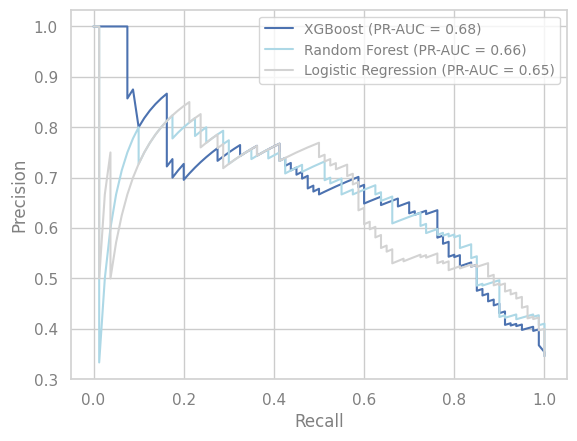

In [71]:
plt.plot(recalls, precisions, label=f'XGBoost (PR-AUC = {pr_auc:.2f})')
plt.plot(rc_rf, pr_rf, color='lightblue', label=f'Random Forest (PR-AUC = {pr_auc_rf:.2f})')
plt.plot(rc_lr, pr_lr, color='lightgrey', label=f'Logistic Regression (PR-AUC = {pr_auc_lr:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best', prop={'size': 10});

Interpretação:  
1. PR-AUC (área sob a curva)
    - **XGBoost (0.68):** Interpretação apresentada acima;
    - **Random Forest (0.66):** Performance ligeiramente inferior ao XGBoost;
    - **Logistic Regression (0.65):** Menor PR-AUC, corroborando com a ideia de que o modelo tem mais dificuldade em capturar verdadeiros positivos com alta precisão.
2. Forma da curva
    - **XGBoost:** Interpretação apresentada acima;
    - **Random Forest:** Trajetória semelhante ao XGBoost, mas menos consistente (quedas mais bruscas em certas regiões), indicando leve comprometimento da precisão em alguns limiares;
    - **Logistic Regression:** A curva é mais irregular e tende a decair mais rapidamente, o que novamente corrobora à maior dificuldade em manter alta precisão em limiares mais baixos.

**CONCLUSÃO**  
A escolha pelo XGBoost, em comparação aos outros modelos, parece ser correta, especialmente considerando o dataset desbalanceado.  
O Random Forest pode ser uma ótima opção, caso se opte por um modelo mais simples e interpretável, mas ainda assim com bom desempenho (semelhante ao XGBoost).